### NAME : S.Sanjith
### ID NO : 190562G
### COURSE CODE : EN2550

In [1]:
#Importing libraries
import matplotlib.pyplot as plt 
import sympy 
import numpy as np
import cv2 as cv

In [6]:
f1=cv.imread(r'images/building.tif') #,cv . IMREAD_GRAYSCALE
assert f1 is not None

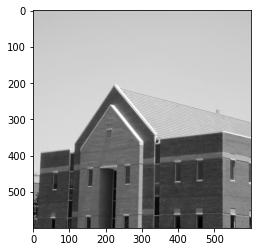

In [7]:
fig, ax =plt.subplots() 
ax.imshow(f1,cmap='gray',vmin=0,vmax=255)
plt.show()